# Alphavantage Intraday
* API for "real time" stock data
* Freemium model
* Can make API calls directly or install the helper library:
pip install alpha_vantage from the command line

#### https://alphavantage.co

### 1. Set up Environment

In [1]:
!pip install -q alpha-vantage

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

### 2. Store API Key

In [3]:
key = open('alpha-api.txt').read()

### 3. Create TimeSeries Object and Make API Call

In [4]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')

### 4. Examine Data

In [5]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2025-09-02 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20160 entries, 2025-09-02 19:59:00 to 2025-08-04 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20160 non-null  float64
 1   2. high    20160 non-null  float64
 2   3. low     20160 non-null  float64
 3   4. close   20160 non-null  float64
 4   5. volume  20160 non-null  float64
dtypes: float64(5)
memory usage: 945.0 KB


In [7]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-09-02 19:59:00,331.2801,331.365,331.28,331.3400,5056.0
2025-09-02 19:58:00,331.2650,331.310,331.23,331.3099,3027.0
2025-09-02 19:57:00,331.2200,331.300,331.16,331.2650,4214.0
2025-09-02 19:56:00,331.1300,331.300,331.07,331.2200,6300.0
2025-09-02 19:55:00,331.1400,331.160,331.05,331.1000,1558.0


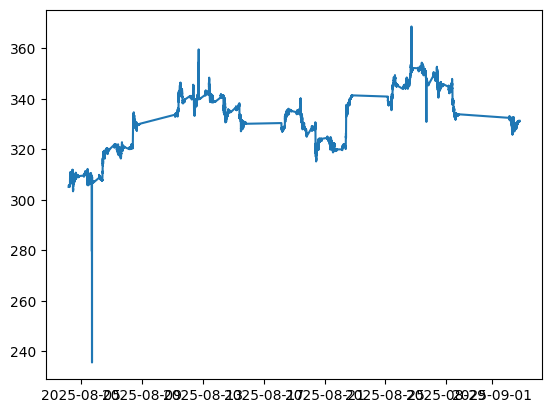

In [8]:
plt.plot(data['4. close'])

### 5. Rename Columns and Add Separate Date and Time Columns

In [9]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [10]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [11]:
data.loc['2020-12-31']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,


In [12]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8211 entries, 2025-08-04 09:30:00 to 2025-09-02 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       8211 non-null   float64
 1   high       8211 non-null   float64
 2   low        8211 non-null   float64
 3   close      8211 non-null   float64
 4   volume     8211 non-null   float64
 5   TradeDate  8211 non-null   object 
 6   time       8211 non-null   object 
dtypes: float64(5), object(2)
memory usage: 513.2+ KB


In [13]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

/tmp/ipython-input-3820792097.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  market.groupby('TradeDate').agg({'low':min, 'high':max})
/tmp/ipython-input-3820792097.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  market.groupby('TradeDate').agg({'low':min, 'high':max})


,low,high
TradeDate,,
2025-08-04,303.0001,312.1186
2025-08-05,305.5000,312.4499
2025-08-06,306.9345,320.4700
2025-08-07,316.1600,322.4000
2025-08-08,320.9800,335.1500
2025-08-11,334.1500,346.6400
2025-08-12,332.9400,345.2600
2025-08-13,338.2000,348.9800
2025-08-14,330.4000,340.4699


In [14]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2025-08-04 10:55:00,303.5600,303.9100,303.0001,303.8300,369033.0,2025-08-04,10:55:00
2025-08-05 09:34:00,305.8348,306.2000,305.5000,306.0250,305399.0,2025-08-05,09:34:00
2025-08-06 09:31:00,307.7200,308.9200,306.9345,308.6772,302913.0,2025-08-06,09:31:00
2025-08-07 14:25:00,316.3300,316.5000,316.1600,316.4100,138085.0,2025-08-07,14:25:00
2025-08-08 09:30:00,321.4300,323.6600,320.9800,322.7400,820381.0,2025-08-08,09:30:00
2025-08-11 09:30:00,335.0000,339.6600,334.1500,339.3700,2068917.0,2025-08-11,09:30:00
2025-08-12 10:11:00,334.2400,334.4102,332.9400,333.7350,649413.0,2025-08-12,10:11:00
2025-08-13 14:14:00,338.5900,340.1100,338.2000,339.9952,394215.0,2025-08-13,14:14:00
2025-08-14 11:43:00,330.6800,331.0200,330.4000,330.7550,266068.0,2025-08-14,11:43:00


In [15]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2025-08-04 10:07:00,311.7500,312.1186,311.7100,311.9692,467801.0,2025-08-04,10:07:00
2025-08-05 09:54:00,311.5100,312.4499,311.4187,312.2399,570574.0,2025-08-05,09:54:00
2025-08-06 15:19:00,319.8300,320.4700,319.8100,320.2916,699480.0,2025-08-06,15:19:00
2025-08-07 10:04:00,322.0500,322.4000,321.7500,321.9300,360014.0,2025-08-07,10:04:00
2025-08-08 12:05:00,331.0000,335.1500,330.9499,331.2500,99231.0,2025-08-08,12:05:00
2025-08-11 12:32:00,346.4800,346.6400,346.3800,346.3800,169804.0,2025-08-11,12:32:00
2025-08-12 09:30:00,345.0000,345.2600,342.7000,343.2969,1339199.0,2025-08-12,09:30:00
2025-08-13 09:45:00,347.5900,348.9800,347.5900,348.0000,1022558.0,2025-08-13,09:45:00
2025-08-14 10:43:00,340.4400,340.4699,339.4100,339.4389,305584.0,2025-08-14,10:43:00
